In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import feature_engineering as fe

from pydataset import data
import warnings
warnings.filterwarnings("ignore")

1.) Select a dataset with a continuous target variable.

In [2]:
swiss_df=data('swiss')

In [3]:
swiss_df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


2.) Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [4]:
swiss_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [5]:
target = 'Fertility'

In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = fe.train_validate_test(swiss_df, target)

In [7]:
obj_cols = fe.get_object_cols(X_train)

In [8]:
num_cols = fe.get_numeric_X_cols(X_train, obj_cols)

In [9]:
X_train_scaled, X_validate_scaled, X_test_scaled = fe.min_max_scale(X_train, X_validate, X_test, num_cols)

3.) Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [10]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [11]:
#fertility mean
fertility_pred_mean = y_train['Fertility'].mean()
y_train['fertility_pred_mean'] = fertility_pred_mean
y_validate['fertility_pred_mean'] = fertility_pred_mean

#fertility median
fertility_pred_median = y_train['Fertility'].median()
y_train['fertility_pred_median'] = fertility_pred_median
y_validate['fertility_pred_median'] = fertility_pred_median

#RMSE of fertility mean
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_mean)**(1/2)

print('BASELINE')
print('-------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('-------------')
#RMSE of fertility median
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

BASELINE
-------------
RMSE using Mean
Train/In-Sample:  9.77 
Validate/Out-of-Sample:  14.78
-------------
RMSE using Median
Train/In-Sample:  9.78 
Validate/Out-of-Sample:  14.83


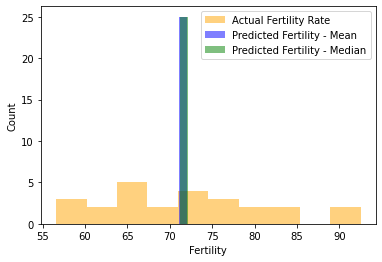

In [12]:
#visualize
plt.hist(y_train.Fertility, color='orange', alpha=.5, label="Actual Fertility Rate")
plt.hist(y_train.fertility_pred_mean, bins=1, color='blue', alpha=.5, rwidth=100, label="Predicted Fertility - Mean")
plt.hist(y_train.fertility_pred_median, bins=1, color='green', alpha=.5, rwidth=100, label="Predicted Fertility - Median")
plt.xlabel("Fertility")
plt.ylabel("Count")
plt.legend()
plt.show()

<br>
<br>

LinearRegression (OLS)

 - Fit the model using X_train_scaled and the labels from y_train.
 - Predict final grade for students in training sample using our model (lm).
 - Evaluate using RMSE
 - Repeat predictions and evaluation for validation.
 - Compare RMSE train vs. validation. Overfitting?

In [13]:
#create model object
lm = LinearRegression(normalize=True)

#fit the model to our training data, specify column since it is a dataframe
lm.fit(X_train_scaled,y_train.Fertility)

#predict train
y_train['fertility_pred_lm'] = lm.predict(X_train)

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_lm)**(1/2)

#predict validate
y_validate['fertility_pred_lm'] = lm.predict(X_validate)

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
                                                                            

RMSE for OLS using LinearRegression
Training/In-Sample:  615.302228544271 
Validation/Out-of-Sample:  628.5498170704727


<br>
<br>

LassoLars

 - Fit the model using X_train_scaled and the labels from y_train.
 - Predict final grade for students in training sample using our model (lars).
 - Evaluate using RMSE
 - Repeat predictions and evaluation for validation.
 - Compare RMSE train vs. validation. Overfitting?

In [14]:
#create model object
lars = LassoLars(alpha=1.0)

#fit the model, be sure to specify y_train column since it is a dataframe
lars.fit(X_train_scaled,y_train.Fertility)

#predict train
y_train['fertility_pred_lars'] = lars.predict(X_train)

#evaluate rmse for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_lars)**(1/2)

#predict_validate
y_validate['fertility_pred_lars'] = lars.predict(X_validate)

#evaluate rmse for validate
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  190.59126185120388 
Validation/Out-of-Sample:  124.32119824359873


<br>
<br>

TweedieRegressor (GLM)

 - Fit the model using X_train_scaled and the labels from y_train.
 - Predict final grade for students in training sample using our model (glm).
 - Evaluate using RMSE
 - Repeat predictions and evaluation for validation.
 - Compare RMSE train vs. validation. Overfitting?

In [15]:
#create model object
glm = TweedieRegressor(power=1, alpha=0)

#fit the model, specify y_train column cause it's a dataframe
glm.fit(X_train_scaled,y_train.Fertility)

# predict train
y_train['fertility_pred_glm'] = glm.predict(X_train_scaled)

# evaluate rmse for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_glm)**(1/2)

# predict validate
y_validate['fertility_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  4.480345159948011 
Validation/Out-of-Sample:  65.87451250065737


<br>
<br>

Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

 - Create the new features, based on value indicated for degree for train, validate & test.
 - Fit the Linear Regression model
 - Predict using the transformed (squared or cubed, e.g.) features
 - Evaluate using RMSE
 - Repeat predictions and evaluation for validation.
 - Compare RMSE train vs. validation. Overfitting?


In [16]:
#making polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

#fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

#transform X_validate_scaled, and X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [17]:
#okay let's do linear regression again
lm2 = LinearRegression(normalize=True)

#fit the model using scaled X_train, once again specify y_train column
lm2.fit(X_train_degree2, y_train.Fertility)

#predict train
y_train['fertility_pred_lm2'] = lm2.predict(X_train_degree2)

#evaluate rmse for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_lm2)**(1/2)

#predict validate
y_validate['fertility_pred_lm2'] = lm2.predict(X_validate_degree2)

#evaluate rmse for validate
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  2.589394260668318 
Validation/Out-of-Sample:  26.657466827351666


<br>
<br>

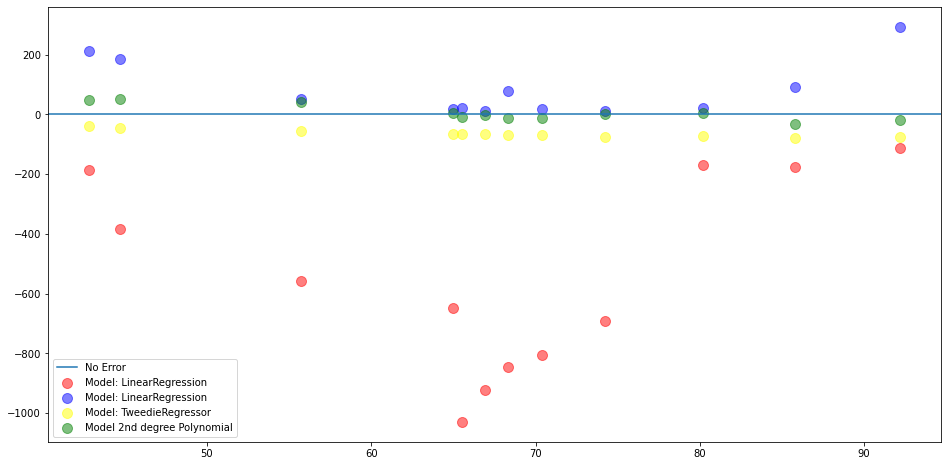

In [18]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_lm-y_validate.Fertility, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_lars-y_validate.Fertility, 
            alpha=.5, color="blue", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_glm-y_validate.Fertility, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_lm2-y_validate.Fertility, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()

In [19]:
#I believe 2nd degree polymonial is the best

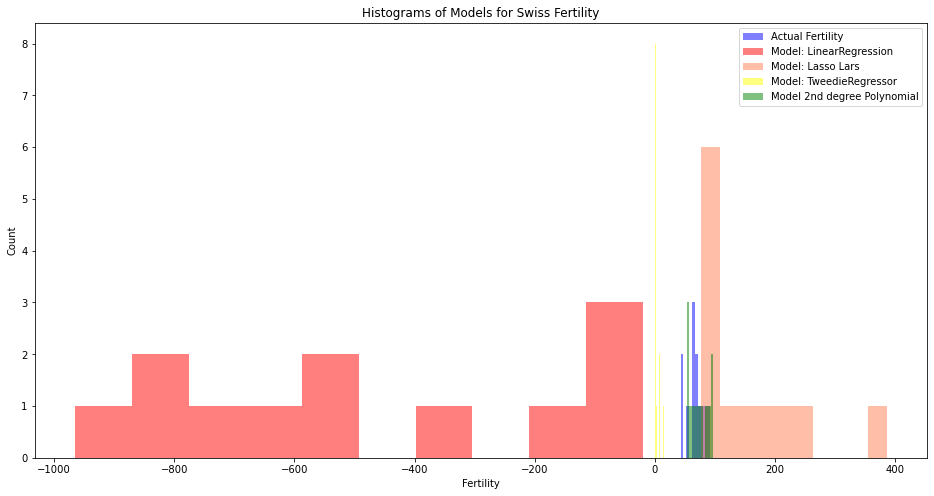

In [20]:
plt.figure(figsize=(16,8))
plt.hist(y_validate.Fertility, color='blue', alpha=.5, label="Actual Fertility")
plt.hist(y_validate.fertility_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.fertility_pred_lars, color='coral', alpha=.5, label="Model: Lasso Lars")
plt.hist(y_validate.fertility_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.fertility_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Fertility")
plt.ylabel("Count")
plt.title("Histograms of Models for Swiss Fertility")
plt.legend()
plt.show()

In [21]:
#I still think 2nd degree polynomial is the best...it's kind of hard to tell. I'll use it for my test. 

In [25]:
#turning it into a dataframe
y_test = pd.DataFrame(y_test)

# predicting on our test model
y_test['fertility_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Fertility, y_test.fertility_pred_lm2)**(1/2)

print("RMSE for OLS Model using LinearRegression (2 degrees)\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression (2 degrees)
Out-of-Sample Performance:  59.766330145079685


In [23]:
X_train_scaled.shape, X_test_scaled.shape

((25, 5), (10, 5))

In [24]:
y_test.shape

(10, 1)

In [ ]:
data('snails', show_doc=True)

In [ ]:
snails = data('baboon')

In [ ]:
snails.head()

In [ ]:
type(y_train.Fertility)